In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['17'][1]
models = []
scalers = []
all_dummies = []

In [8]:
len(routes['17'][1])

67

## With neural networks

In [2]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['17'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 1380 to 1381


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 1380 to 1381
min pred: 28.94311168238051
mean pred: 35.254493603256506
max pred: 43.62634059394362
Mape: 59.859556244973234
r2: 0.032758875122419706
mae: 15.650508635433354 


Building for 1381 to 1406
model for: 1381 to 1406
min pred: 61.557657747082985
mean pred: 114.23648192481737
max pred: 133.33586897233312
Mape: 44.24462363249293
r2: 0.03357319098579248
mae: 39.63013319465684 


Building for 1406 to 1407
model for: 1406 to 1407
min pred: 39.15701761200596
mean pred: 59.76359130842395
max pred: 70.22841194466504
Mape: 35.52522996276267
r2: 0.0460854618590808
mae: 19.501144009738095 


Building for 1407 to 1409
model for: 1407 to 1409
min pred: 31.38788663418518
mean pred: 49.81432907657443
max pred: 60.721561367457724
Mape: 36.994026315950606
r2: 0.07082469628015808
mae: 15.9313202027635 


Building for 1409 to 3353
model for: 1409 to 3353
min pred: 36.85933956941753
mean pred: 63.40143019928471
max pred: 74.87517055796569
Mape: 45.57646387296229
r2: 0.05148911040616943

model for: 1055 to 2868
min pred: 48.452265411329876
mean pred: 62.22513588575112
max pred: 88.16364442223616
Mape: 21.82049688079339
r2: 0.10923147555026413
mae: 13.524071923167975 


Building for 2868 to 2892
model for: 2868 to 2892
min pred: 28.313886498831067
mean pred: 94.13352383558762
max pred: 293.38886156926446
Mape: 34.60260556695767
r2: 0.30087737992377284
mae: 37.71437209008934 


Building for 2892 to 2893
model for: 2892 to 2893
min pred: 22.76143693757542
mean pred: 42.031950969424166
max pred: 84.74307119528542
Mape: 42.90663281172816
r2: 0.21895762778264138
mae: 16.0254165107563 


Building for 2893 to 2894
model for: 2893 to 2894
min pred: 25.558262977211385
mean pred: 45.888569159826844
max pred: 86.61614364770537
Mape: 29.871912419590387
r2: 0.32450732618736455
mae: 13.704466640850324 


Building for 2894 to 2895
model for: 2894 to 2895
min pred: 21.03855011155235
mean pred: 37.62143149645308
max pred: 54.46873375088392
Mape: 34.25494364190963
r2: 0.09930594451134522

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 2052 to 2082
min pred: 32.24966349354647
mean pred: 44.0391644791072
max pred: 52.66484283322381
Mape: 20.647916656225146
r2: -0.2857974491791886
mae: 10.680816699487666 


Building for 2082 to 2083
model for: 2082 to 2083
min pred: 28.154657423414978
mean pred: 44.51816313105395
max pred: 77.29358519327934
Mape: 55.558878316395194
r2: -0.11574770385118716
mae: 17.836221521155903 


Building for 2083 to 2009
model for: 2083 to 2009
min pred: 6.980633872081892
mean pred: 36.338551055819764
max pred: 81.93634167327149
Mape: 90.10018333448062
r2: -0.08001794362004988
mae: 33.4662776175876 


Building for 2009 to 2010
model for: 2009 to 2010
min pred: 60.07990321199343
mean pred: 82.63625315809485
max pred: 101.63636272270037
Mape: 30.890291605825457
r2: 0.0887230596655415
mae: 21.190642078992354 


Building for 2010 to 462
model for: 2010 to 462
min pred: 32.734305965283994
mean pred: 47.771915987699586
max pred: 56.823649024826636
Mape: 31.630582971179305
r2: 0.041939198259802

In [32]:
import pickle
with open('/data/chainedneuralmodels.bin','rb') as handle:
   
    d=pickle.load(handle)
models = d['models']
scalers = d['x-scalers']
y_scalers = d['y-scalers']

In [5]:
def get_merged(stop):
    route = routes['17'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

In [6]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [9]:
MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,64):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
170.79355764389038


In [14]:
sum(MAPES)/len(MAPES)

14.120717480001174

In [11]:
min(MAPES)

7.543098508514565

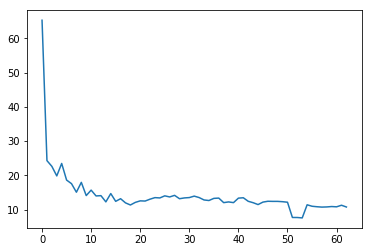

In [15]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

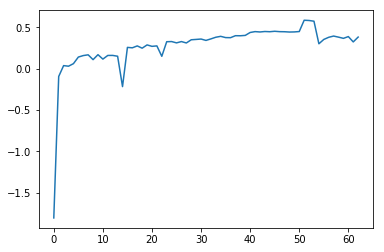

In [16]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


-0.5894347329251236

ValueError: x and y must have same first dimension, but have shapes (60,) and (77,)

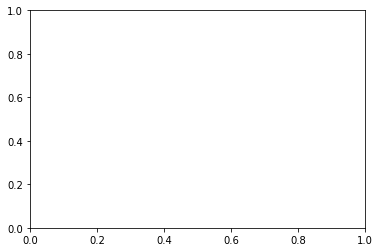

In [10]:
from matplotlib import pyplot as plt
plt.plot(range(9,69),r2s[8:])


In [13]:
max(r2s)

0.5167369239106632

In [17]:
r2s

[-2.3243963800559464,
 -5.122852718987301,
 -1.466225453086044,
 -0.9765732214368865,
 0.04131244740870532,
 -0.05741087802918754,
 -0.21335463841355584,
 -0.044777395479644655,
 0.020514438062677054,
 0.14775545095191123,
 -0.09843726146392595,
 0.0903747652054614,
 0.28604008081344,
 0.20765217756066245,
 0.2723283514588516,
 0.22319049829180637,
 0.2451910419534553,
 0.21236341277763426,
 0.30161277569223943,
 0.3465129756070603,
 0.35254771477960267,
 0.27478340419172265,
 0.2625933693915301,
 0.3497972083635482,
 0.3397104819858573,
 0.3469183890249389,
 0.36170864252864066,
 0.3260883969942254,
 0.40574149757735134,
 0.3272323686015437,
 -0.1736892263550447,
 -0.39244511728335274,
 0.06570195164843029,
 0.2441273048369964,
 0.25790235342469836,
 0.24597415275739953,
 0.2509308891626172,
 0.34613515806401063,
 0.3695159604058712,
 0.38139908855394056,
 0.3796616107914146,
 0.36876404375336835,
 0.36139120455344076,
 0.37522733502024297,
 0.38243218382087707,
 0.40324094695441537,


In [15]:
max(r2s)

0.47391227923156953

In [ ]:
import pickle
with open('/data/chainedneuralmodels.bin','wb') as handle:
    d= {'models':models,\
       'x-scalers':scalers,\
        'y-scalers':y_scalers}
    pickle.dump(d,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
len(models)

69